In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
train_data_path = "./data/train_piece_count.csv"
test_data_path = "./data/test_piece_count.csv"

games_df = pd.read_csv(test_data_path, delimiter=";", usecols=["white_elo", "black_elo", "result", "ply"])

In [3]:
def data_count(games_df):
    count_games_per_elo = {}
    count_moves_per_elo = {}
    count_moves_per_ply_range = {}

    for i, game in games_df.iterrows():
        # print(game)
        white_elo_rounded = (game["white_elo"]) // 100 * 100
        black_elo_rounded = (game["black_elo"]) // 100 * 100

        white_elo_key = f"elo_{white_elo_rounded}"
        black_elo_key = f"elo_{black_elo_rounded}"

        white_black_key = f"elo_{white_elo_rounded}_{black_elo_rounded}"
        black_white_key = f"elo_{black_elo_rounded}_{white_elo_rounded}"

        for key in set([white_black_key, black_white_key, white_elo_key, black_elo_key]):
            if key not in count_games_per_elo:
                count_games_per_elo[key] = 0
            if key not in count_moves_per_elo:
                count_moves_per_elo[key] = 0
            
            count_games_per_elo[key] += 1


        ply = game["ply"]

        white_moves = ply // 2 + ply % 2
        black_moves = ply // 2

        count_moves_per_elo[white_elo_key] += white_moves
        count_moves_per_elo[black_elo_key] += black_moves

        count_moves_per_elo[white_black_key] += white_moves
        count_moves_per_elo[black_white_key] += black_moves

        for range_start in range(1, game["ply"], 10):
            range_end = min(range_start + 9, game["ply"])
            moves_in_range = range_end - range_start + 1
            range_key = f"ply_{range_start}_{range_start + 9}"
            count_moves_per_ply_range[range_key] = count_moves_per_ply_range.get(range_key, 0) + moves_in_range

    return {
        "games_count_per_elo": count_games_per_elo,
        "moves_count_per_elo": count_moves_per_elo,
        "moves_count_per_ply_range": count_moves_per_ply_range
    }


In [ ]:
with open("test_results/data_count.json", "w") as f:
    import json
    json.dump(data_count(games_df), f, indent=2)

In [5]:
avg_elo = (games_df["white_elo"] + games_df["black_elo"]) / 2

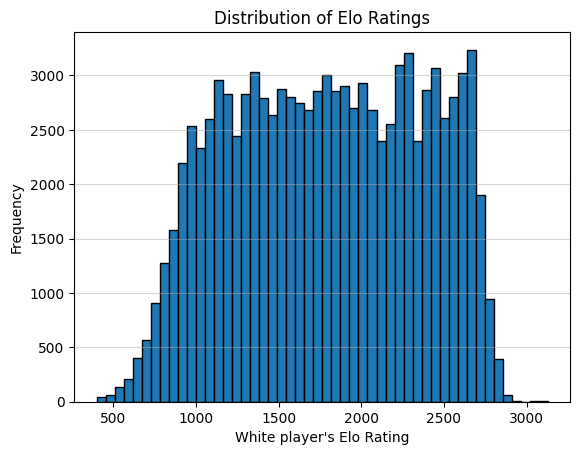

In [6]:
plt.hist(games_df.black_elo, bins=50, edgecolor='black')
plt.title("Distribution of Elo Ratings")
plt.xlabel("White player's Elo Rating")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.5)
plt.show()

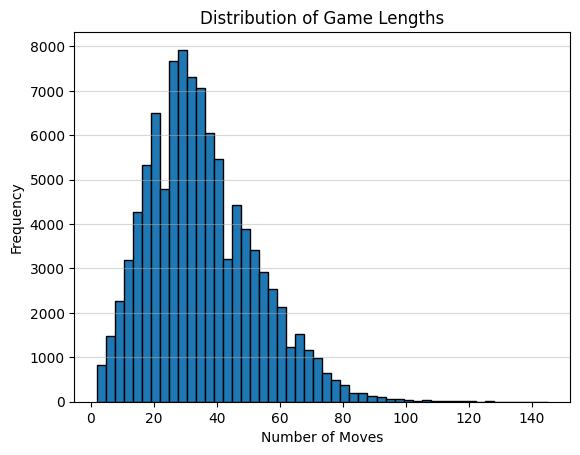

In [7]:
plt.hist(games_df.ply // 2, bins=50, edgecolor='black')
plt.title("Distribution of Game Lengths")
plt.xlabel("Number of Moves")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.5)
plt.show()

In [8]:
import json
import pathlib

with open("./test_results/accuracy/piece_count_model.json", "r") as f:
    piece_count_results = json.load(f)

with open("./test_results/accuracy/base_elo_model.json", "r") as f:
    base_elo_results = json.load(f)

with open("./test_results/accuracy/base_elo_model_no_mask.json", "r") as f:
    base_elo_no_mask_results = json.load(f)

with open("./test_results/accuracy/no_elo_model.json", "r") as f:
    no_elo_results = json.load(f)

with open("./test_results/accuracy/material_model.json", "r") as f:
    material_results = json.load(f)

In [ ]:
no_elo_acc = no_elo_results["test_acc"]
elo_acc = base_elo_results["test_acc"]
elo_no_mask_acc = base_elo_no_mask_results["test_acc"]
material_acc = material_results["test_acc"]
piece_count_acc = piece_count_results["test_acc"]

acc_df = pd.DataFrame({
    "Model": ["No Elo", "Elo", "Elo (No Mask)", "Material", "Piece Count"],
    "Accuracy": [no_elo_acc, elo_acc, elo_no_mask_acc, material_acc, piece_count_acc]
})

acc_df

,Model,Accuracy
0,No Elo,0.510052
1,Elo,0.513278
2,Elo No Mask,0.513020
3,Material,0.521003
4,Piece Count,0.521869


In [14]:
no_elo_perplexity = no_elo_results["test_perplexity"]
elo_perplexity = base_elo_results["test_perplexity"]
elo_no_mask_perplexity = base_elo_no_mask_results["test_perplexity"]
material_perplexity = material_results["test_perplexity"]
piece_count_perplexity = piece_count_results["test_perplexity"]

perplexity_df = pd.DataFrame({
    "Model": ["No Elo", "Elo", "Elo (No Mask)", "Material", "Piece Count"],
    "Perplexity": [no_elo_perplexity, elo_perplexity, elo_no_mask_perplexity, material_perplexity, piece_count_perplexity]
})

perplexity_df

,Model,Perplexity
0,No Elo,4.590409
1,Elo,4.564113
2,Elo (No Mask),4.558848
3,Material,4.396007
4,Piece Count,4.382242


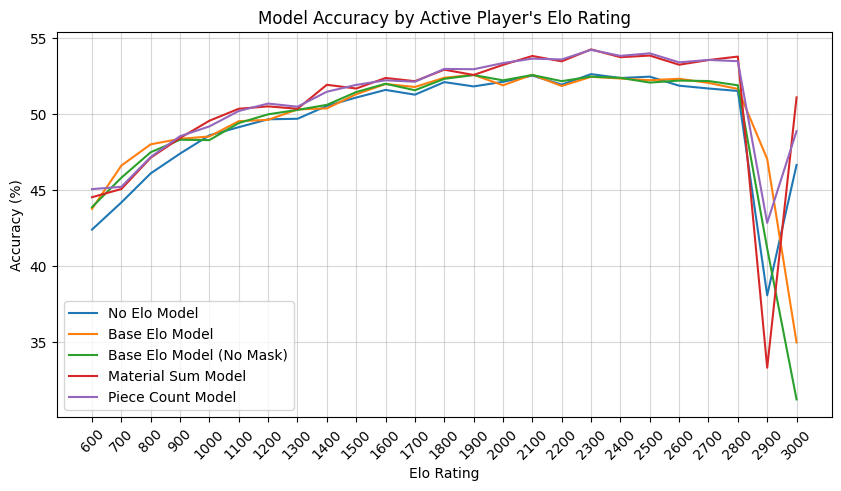

In [18]:
plt.figure(figsize=(10, 5))

elo_values = list(range(600, 3001, 100))
piece_count_accuracy = [piece_count_results.get(f"test_acc_elo_{elo}", 0) * 100 for elo in elo_values]
base_elo_accuracy = [base_elo_results.get(f"test_acc_elo_{elo}", 0) * 100 for elo in elo_values]
base_elo_no_mask_accuracy = [base_elo_no_mask_results.get(f"test_acc_elo_{elo}", 0) * 100 for elo in elo_values]
no_elo_accuracy = [no_elo_results.get(f"test_acc_elo_{elo}", 0) * 100 for elo in elo_values]
material_accuracy = [material_results.get(f"test_acc_elo_{elo}", 0) * 100 for elo in elo_values]

plt.plot(elo_values, no_elo_accuracy, label='No Elo Model')
plt.plot(elo_values, base_elo_accuracy, label='Base Elo Model')
plt.plot(elo_values, base_elo_no_mask_accuracy, label='Base Elo Model (No Mask)')
plt.plot(elo_values, material_accuracy, label='Material Sum Model')
plt.plot(elo_values, piece_count_accuracy, label='Piece Count Model')

plt.title("Model Accuracy by Active Player's Elo Rating")
plt.xlabel("Elo Rating")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.xticks(elo_values, rotation=45)
plt.grid(alpha=0.5)


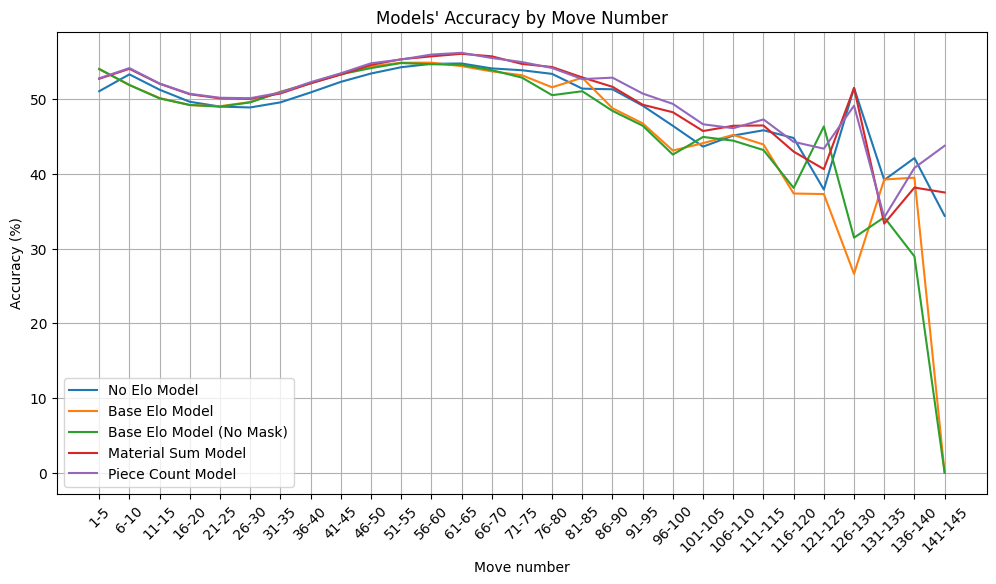

In [17]:
ply_values = range(1, 290, 10)

piece_count_accuracy_ply = [piece_count_results.get(f"test_acc_ply_{ply}-{ply+9}", 0) * 100 for ply in ply_values]
base_elo_accuracy_ply = [base_elo_results.get(f"test_acc_ply_{ply}-{ply+9}", 0) * 100 for ply in ply_values]
base_elo_no_mask_accuracy_ply = [base_elo_no_mask_results.get(f"test_acc_ply_{ply}-{ply+9}", 0) * 100 for ply in ply_values]
no_elo_accuracy = [no_elo_results.get(f"test_acc_ply_{ply}-{ply+9}", 0) * 100 for ply in ply_values]
material_accuracy = [material_results.get(f"test_acc_ply_{ply}-{ply+9}", 0) * 100 for ply in ply_values]

move_numbers = range(1, 145, 5)
move_numbers = [str(ply) + "-" + str(ply + 4) for ply in move_numbers]

plt.figure(figsize=(12, 6))

plt.plot(move_numbers, no_elo_accuracy, label='No Elo Model')
plt.plot(move_numbers, base_elo_accuracy_ply, label='Base Elo Model')
plt.plot(move_numbers, base_elo_no_mask_accuracy_ply, label='Base Elo Model (No Mask)')
plt.plot(move_numbers, material_accuracy, label='Material Sum Model')
plt.plot(move_numbers, piece_count_accuracy_ply, label='Piece Count Model')
plt.title("Models' Accuracy by Move Number")
plt.xlabel("Move number")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.xticks(move_numbers, rotation=45)
plt.grid()

In [15]:
import re
import seaborn as sns


def plot_elo_heatmap(results, title=""):
    grid = np.full((22, 22), np.nan)

    for key, value in results.items():
        if re.findall(r"test_acc_elo_\d+_\d+", key):
            key_split = key.split("_")
            elo_start = int(key_split[-2])
            elo_end = int(key_split[-1])
            if elo_start > 2700 or elo_end > 2700:
                continue
            grid[elo_start // 100 - 6][elo_end // 100 - 6] = value * 100

    plt.figure(figsize=(15, 15))
    flipped_array = np.flipud(grid)

    x_labels = [f"{i*100}" for i in range(6, 28)]
    y_labels = [f"{i*100}" for i in range(6, 28)]
    y_labels.reverse()

    sns.heatmap(flipped_array, annot=True, fmt=".1f", vmin=0, vmax=100, cmap="viridis", linewidths=0.5,
                linecolor='gray', cbar=True, mask=np.isnan(flipped_array), xticklabels=x_labels, yticklabels=y_labels)

    plt.xlabel("Active Player's Rating")
    plt.ylabel("Opponent Player's Rating")
    plt.title(title)
    plt.show()


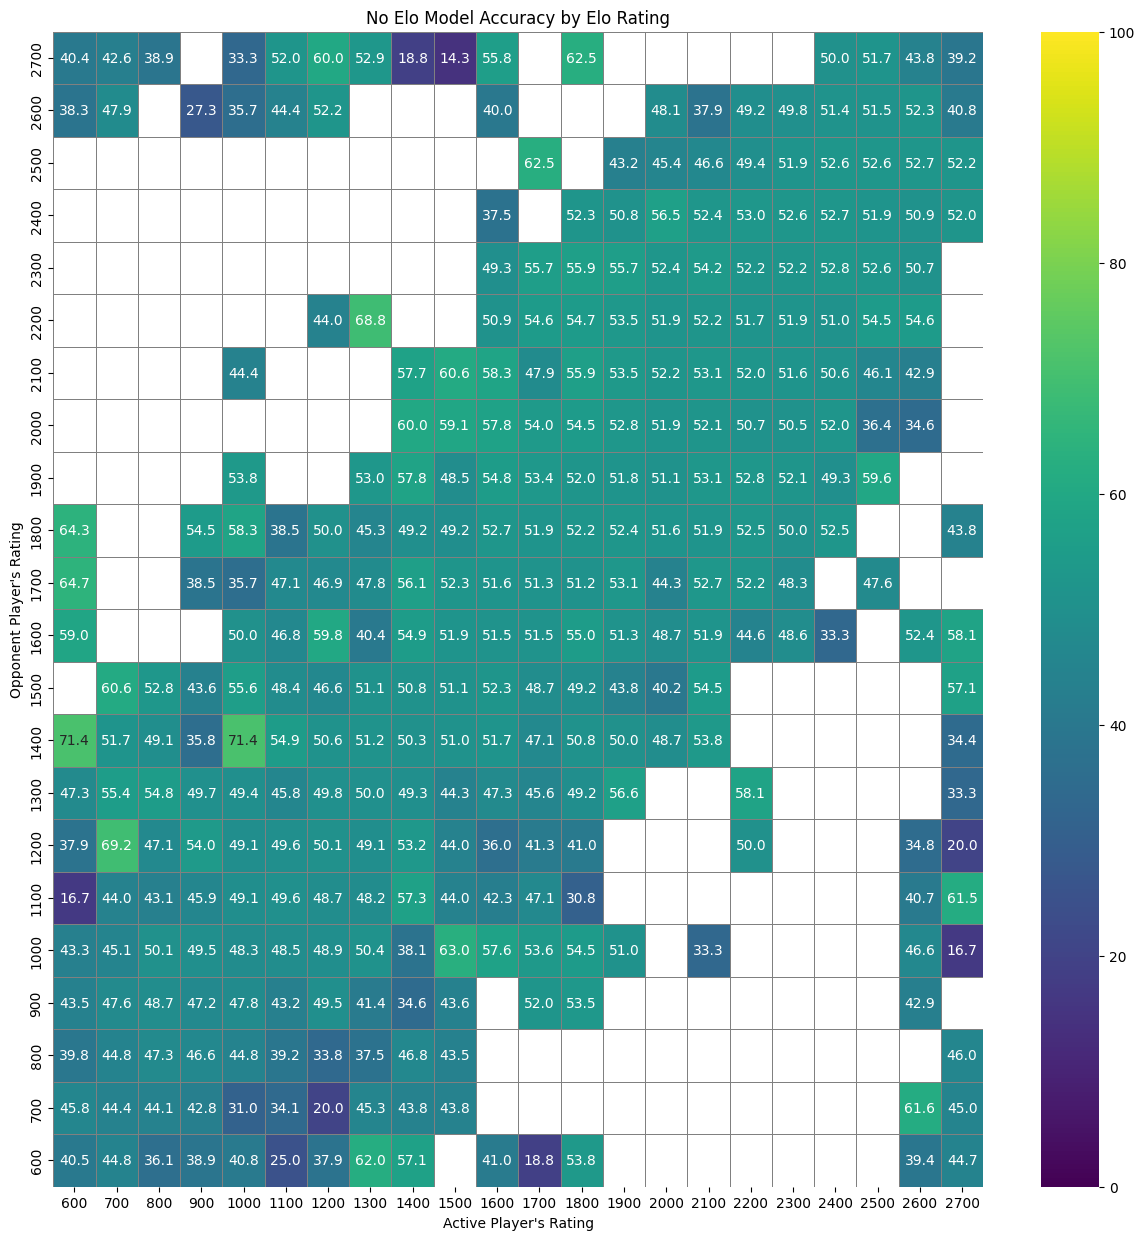

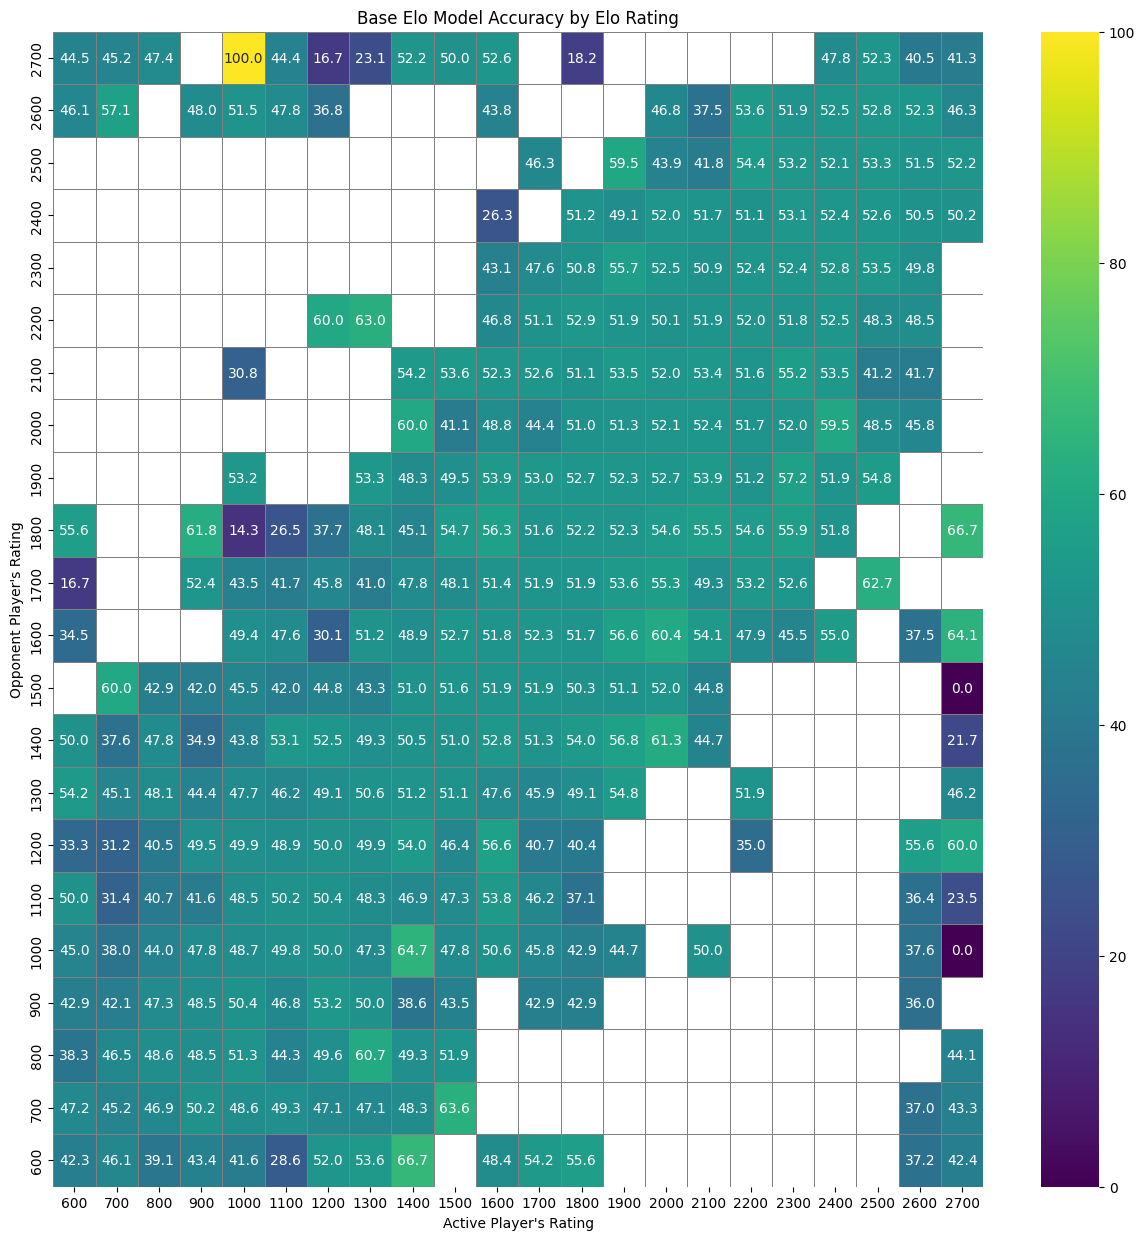

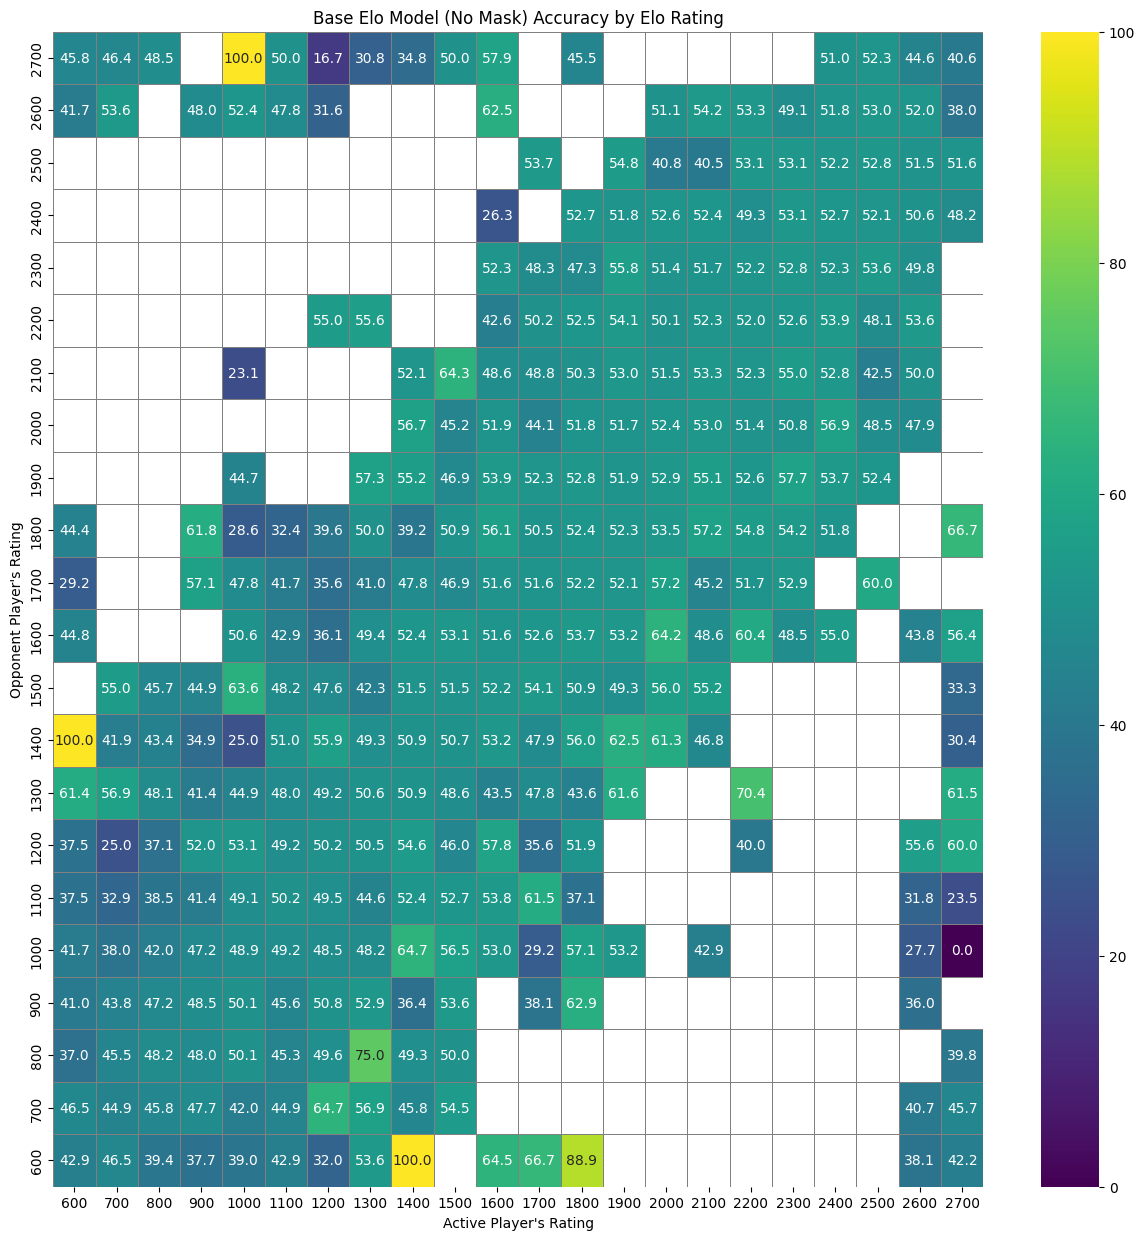

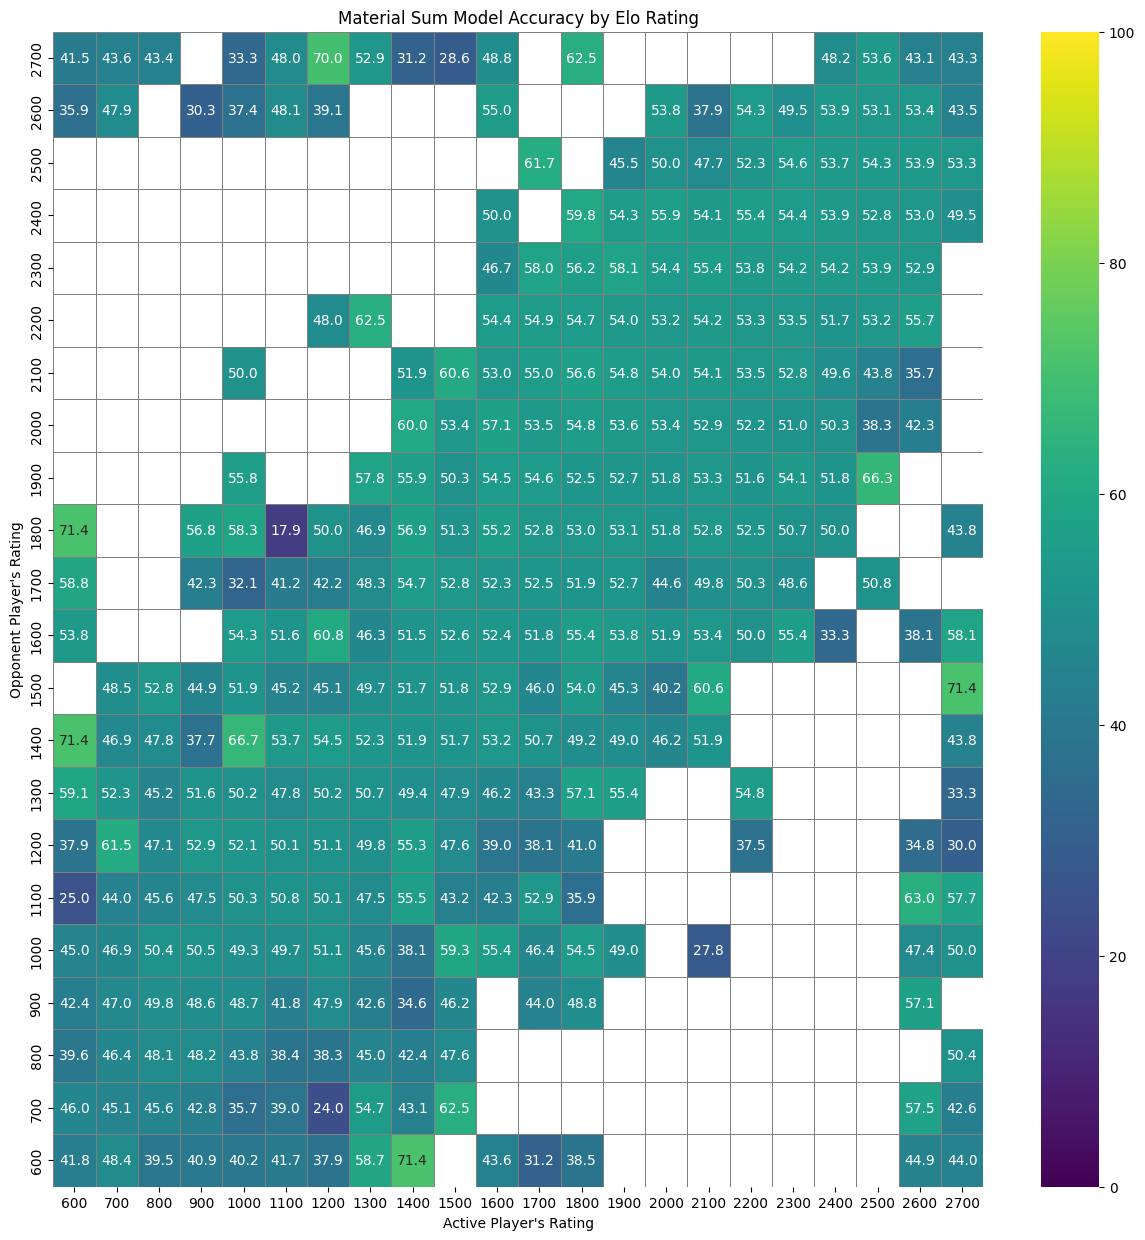

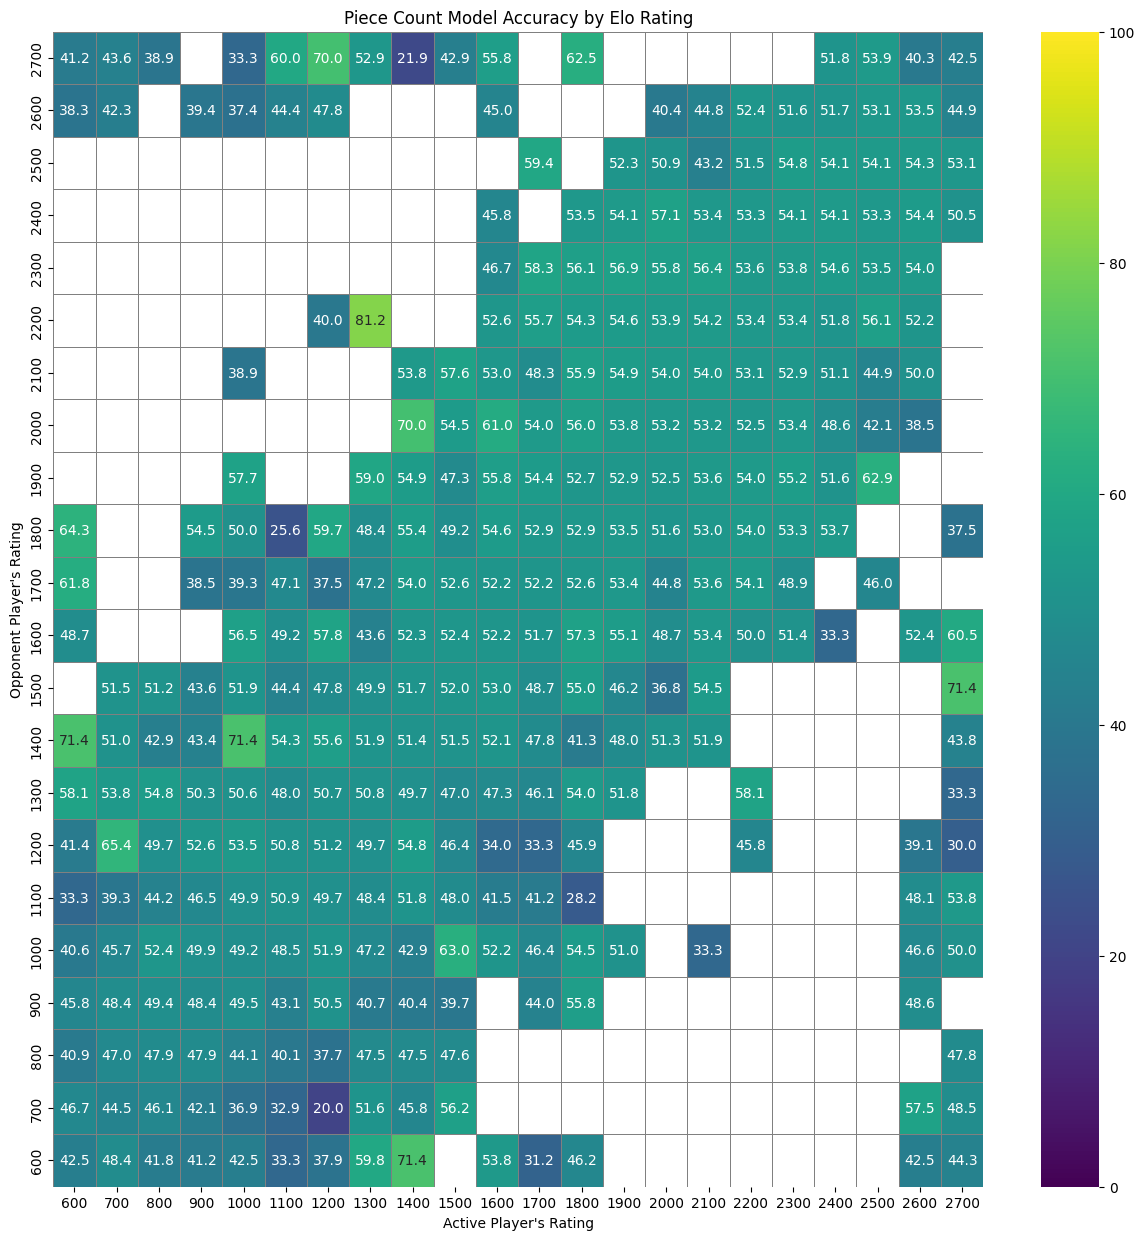

In [16]:
plot_elo_heatmap(no_elo_results, "No Elo Model Accuracy by Elo Rating")
plot_elo_heatmap(base_elo_results, "Base Elo Model Accuracy by Elo Rating")
plot_elo_heatmap(base_elo_no_mask_results, "Base Elo Model (No Mask) Accuracy by Elo Rating")
plot_elo_heatmap(material_results, "Material Sum Model Accuracy by Elo Rating")
plot_elo_heatmap(piece_count_results, "Piece Count Model Accuracy by Elo Rating")


In [9]:
with open("./data/predictions_per_elo.json", "r") as f:
    predictions_per_elo = json.load(f)

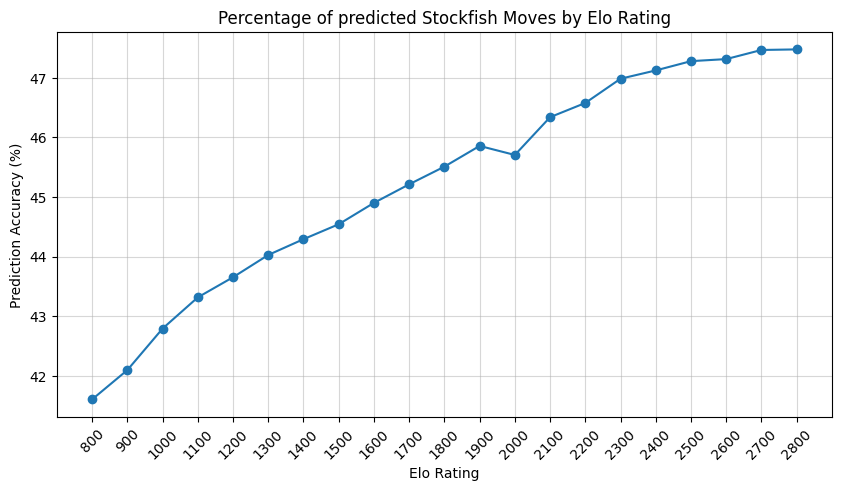

Average Stockfish Move Probabilities by Elo Rating:
Elo 800: 30.06%
Elo 900: 30.95%
Elo 1000: 31.60%
Elo 1100: 32.19%
Elo 1200: 32.66%
Elo 1300: 33.13%
Elo 1400: 33.50%
Elo 1500: 33.83%
Elo 1600: 34.30%
Elo 1700: 34.66%
Elo 1800: 35.00%
Elo 1900: 35.40%
Elo 2000: 35.73%
Elo 2100: 36.15%
Elo 2200: 36.50%
Elo 2300: 36.81%
Elo 2400: 37.00%
Elo 2500: 37.12%
Elo 2600: 37.21%
Elo 2700: 37.23%
Elo 2800: 37.18%


In [29]:
elos = list(range(800, 2801, 100))

stockfish_predictions = {elo: 0 for elo in elos}
stockfish_move_probabilities = {elo: [] for elo in elos}
all_predictions = 0

for game in predictions_per_elo:
    all_predictions += len(game['predictions'])
    for prediction in game['predictions']:
        stockfish_move = prediction['stockfish_move']
        for elo, elo_prediction in prediction["predictions_per_elo"].items():
            predicted_move = max(elo_prediction, key=elo_prediction.get)
            stockfish_move_probability = elo_prediction[stockfish_move]
            if predicted_move == stockfish_move:
                stockfish_predictions[int(elo)] += 1
            stockfish_move_probabilities[int(elo)].append(stockfish_move_probability)

stockfish_predictions = {elo: count / all_predictions * 100 for elo, count in stockfish_predictions.items()}

plt.figure(figsize=(10, 5))
plt.plot(elos, list(stockfish_predictions.values()), marker='o')
plt.title("Percentage of predicted Stockfish Moves by Elo Rating")
plt.xlabel("Elo Rating")
plt.ylabel("Prediction Accuracy (%)")
plt.xticks(elos, rotation=45)
plt.grid(alpha=0.5)

plt.show()

avg_stockfish_move_probabilities = {elo: np.mean(stockfish_move_probabilities[elo]) for elo in elos}

print("Average Stockfish Move Probabilities by Elo Rating:")
for elo, prob in avg_stockfish_move_probabilities.items():
    print(f"Elo {elo}: {prob*100:.2f}%")